In [3]:
!git clone https://github.com/clementliao1031/IST341MarvelProject.git

Cloning into 'IST341MarvelProject'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (14/14), 616.51 KiB | 10.11 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
filename = 'MCU - Sheet1.csv'
df = pd.read_csv(filename)        # encoding="utf-8" et al.
print(f"{filename} : file read into a pandas dataframe.")

MCU - Sheet1.csv : file read into a pandas dataframe.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               33 non-null     object
 1   WorldWideBoxOffice  33 non-null     object
 2   Take                33 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 924.0+ bytes


In [6]:
import plotly.express as px
filename = 'MCU - Sheet1.csv'
df = pd.read_csv(filename)
fig = px.scatter(df, x="Title", y="Take",
                 hover_data=['WorldWideBoxOffice'])
fig.show()

In [7]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 size='petal_length', hover_data=['petal_width'])
fig.show()

<Axes: >

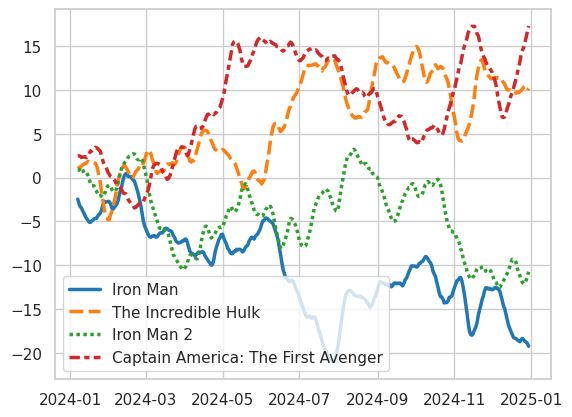

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2024", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["Iron Man", "The Incredible Hulk", "Iron Man 2", "Captain America: The First Avenger"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)


In [9]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.7/204.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 41.7 MB/s eta 0:00:00


In [11]:
import pandas as pd
from darts import TimeSeries

# Read a pandas DataFrame
df = pd.read_csv("AirPassengers.csv", delimiter=",")

# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df, "Month", "#Passengers")

# Set aside the last 36 months as a validation series
train, val = series[:-36], series[-36:]

In [12]:
ts=TimeSeries.from_values(np.arange(33))

In [13]:
#df = pd.read_csv("MCUWorldWideBoxOffice.csv", delimiter=",")
filename = 'MCU - Sheet1.csv'
df = pd.read_csv(filename)        # encoding="utf-8" et al.
# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_series(df["Take"])

# Set aside the last 36 months as a validation series
train, val = series[:-4], series[-4:]

In [14]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

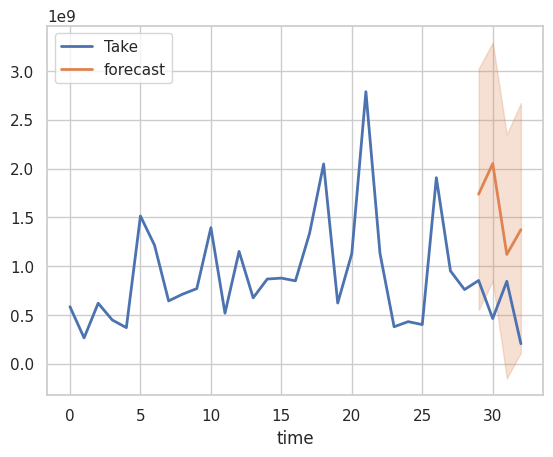

In [15]:
import matplotlib.pyplot as plt

series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()